1&2. Import packages, review dataset

In [ ]:

#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install category_encoders
import category_encoders
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from category_encoders import OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 86 kB 2.8 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning AB/census_data.csv')
# Exploring data
display(data.head())
display(data.info())
display(data.describe())
# Finding missing value
display(data.isnull().sum()) 


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


None

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

3. Build a Random Forest Model

In [ ]:
#feature selection and splitting dataset into data training70% and testing30%
feature_cols = ['age_bin','capital_gl_bin', 'education_bin','hours_per_week_bin',
                'msr_bin','occupation_bin','race_sex_bin']
X = data[feature_cols]#feature
t = data.y #target variable
X_train, X_test, t_train, t_test = train_test_split(X,t,test_size = 0.3, random_state = 1) 
#transform data type from object to float
encoder = OrdinalEncoder(cols = ['age_bin','capital_gl_bin', 'education_bin','hours_per_week_bin',
                                 'msr_bin','occupation_bin','race_sex_bin'], 
                         handle_unknown = 'value', 
                         handle_missing = 'value').fit(X_train,t_train)                          
X_train = encoder.transform(X_train) #transform tranning data set
X_test = encoder.transform(X_test)#transform testing data set

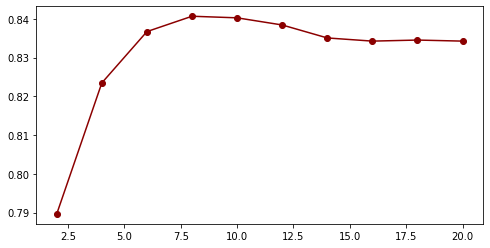

In [ ]:
#finding optimal value of a key parameter
#create empty list, will append accuracy later
results = [] 
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state =101) 
    model.fit(X_train,t_train)
    y_pred =model.predict(X_test) #find the model's predict value
    accuracy=np.mean(t_test ==y_pred) #Compare the test value and predict value, find the accuracy
    results.append(accuracy) # put the value of accuracy to the empty  list

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred', marker='o')

4. Building AdaBoost, Gradient Boost (classifier) and XGB Model

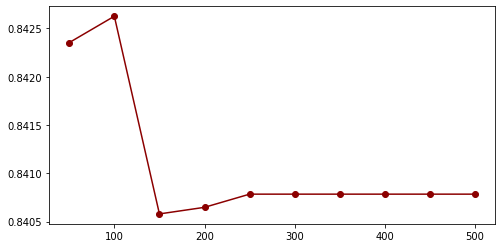

In [ ]:
#Adaboost:
results = [] 
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_options:
    model =AdaBoostClassifier(n_estimators = trees, random_state=101) 
    model.fit(X_train, t_train)
    y_pred = model.predict(X_test) #find the model's predict value
    accuracy =np.mean(t_test==y_pred) #Compare the test value and predict value, find the accuracy
    results.append(accuracy) # put the value of accuracy to the empty  list
    
plt.figure(figsize =(8,4))
pd.Series(results,n_estimator_options).plot(color='darkred', marker='o')

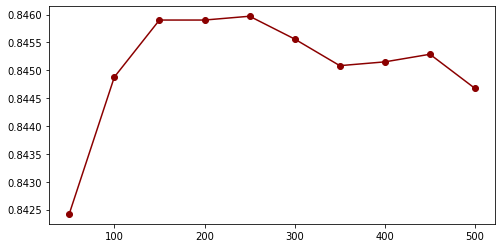

In [ ]:
#Gradiant Boost
results = [] 
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_options:
  model = GradientBoostingClassifier(n_estimators = trees, random_state=101) 
  model.fit(X_train, t_train)
  y_pred = model.predict(X_test) 
  accuracy = np.mean(t_test == y_pred) 
  results.append(accuracy) 

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_options).plot(color='darkred', marker='o')

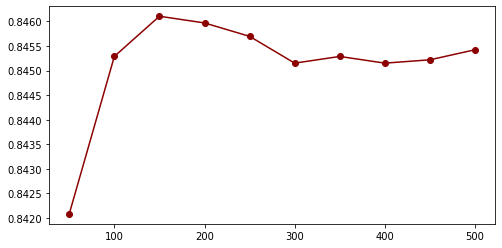

In [ ]:
#XGB Model
results=[] 
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimator_options:
    model = XGBClassifier(n_estimators = trees, random_state = 101) 
    model.fit(X_train, t_train)
    y_pred = model.predict(X_test) 
    accuracy = np.mean(t_test==y_pred) 
    results.append(accuracy) 
    
plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_options).plot(color='darkred',marker ='o')

5. Compare Performance

In [ ]:
n_estimator = [100]
for trees in n_estimator:
#Random Forest
  model1 = RandomForestClassifier(n_estimators = trees, random_state = 101)  
  model1.fit(X_train, t_train)
  y_pred1 = model1.predict(X_test)
  fpr, tpr, thresholds = roc_curve(t_test, y_pred1) #sklearn.metrics.roc_curve return  fpr, tpr, thresholds
  auc1 = auc(fpr, tpr)
  accuracy1 = np.mean(t_test == y_pred1)
#Ada Boost
  model2 = AdaBoostClassifier(n_estimators = trees, random_state = 101)             
  model2.fit(X_train, t_train)
  y_pred2 = model2.predict(X_test)
  fpr, tpr, thresholds = roc_curve(t_test, y_pred2) 
  auc2 = auc(fpr, tpr)
  accuracy2 = np.mean(t_test == y_pred2)
#Gradient Boost(GB) 
  model3 = GradientBoostingClassifier(n_estimators = trees, random_state = 101)              
  model3.fit(X_train, t_train)
  y_pred3 = model3.predict(X_test)
  fpr, tpr, thresholds = roc_curve(t_test, y_pred3) 
  auc3 = auc(fpr, tpr)
  accuracy3 = np.mean(t_test == y_pred3)
#Extra Gradient Boost(XGB)
  model4 = XGBClassifier(n_estimators = trees, random_state = 101)                            
  model4.fit(X_train, t_train)
  y_pred4 = model4.predict(X_test)
  fpr, tpr, thresholds = roc_curve(t_test, y_pred4) 
  auc4 = auc(fpr, tpr)
  accuracy4 = np.mean(t_test == y_pred4)


  table = {'Random Forest': (accuracy1, auc1, trees), 
          'Ada Boost': (accuracy2, auc2, trees),
          'GB': (accuracy3, auc3, trees),
          'XGB': (accuracy4, auc4, trees),}

  df = pd.DataFrame(table, index= ('Accuracy', 'AUC', 'Hyper-parameters'))
  display(df)

,Random Forest,Ada Boost,GB,XGB
Accuracy,0.837166,0.842626,0.844878,0.845288
AUC,0.745954,0.744445,0.752098,0.753151
Hyper-parameters,100.000000,100.000000,100.000000,100.000000
